In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

In [33]:
file_path = '/Users/prasanthp/Downloads/Sensor data.xlsx'
xls = pd.ExcelFile(file_path)

In [34]:
# Function to handle missing values by replacing with the mean
def fill_missing_with_mean(df, column):
    df[column].fillna(df[column].mean(), inplace=True)
    return df

In [35]:
# Initialize lists to store all temperature and humidity data
all_temp_data = []
all_humidity_data = []

In [36]:
# Initialize lists to store the last 100 data points for animation
animation_temp_data = []
animation_humidity_data = []

In [37]:
# Process each sheet
for sheet in xls.sheet_names:
    df = pd.read_excel(xls, sheet, skiprows=3)  # Skip the first 3 rows to get the actual data
    
    # Fill missing values
    df = fill_missing_with_mean(df, 'Temperature (°C)')
    df = fill_missing_with_mean(df, 'Humidity (%)')
    
    # Store all data for plotting
    all_temp_data.append(df['Temperature (°C)'])
    all_humidity_data.append(df['Humidity (%)'])
    
    # Store only the last 100 data points for animation
    animation_temp_data.append(df['Temperature (°C)'].tail(100))
    animation_humidity_data.append(df['Humidity (%)'].tail(100))

/var/folders/mz/8_ng61f51sjbb0z39kqfzb0w0000gn/T/ipykernel_53557/3842771487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
/var/folders/mz/8_ng61f51sjbb0z39kqfzb0w0000gn/T/ipykernel_53557/3842771487.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [38]:
# Concatenate all data for plotting
all_temp_data = pd.concat(all_temp_data, axis=0).reset_index(drop=True)
all_humidity_data = pd.concat(all_humidity_data, axis=0).reset_index(drop=True)

In [39]:
# Concatenate the last 100 data points for animation
animation_temp_data = pd.concat(animation_temp_data, axis=0).reset_index(drop=True)
animation_humidity_data = pd.concat(animation_humidity_data, axis=0).reset_index(drop=True)

In [40]:
# Print information about the combined data
print("Combined Temperature Data:")
print(all_temp_data.describe())
print("\nCombined Humidity Data:")
print(all_humidity_data.describe())

Combined Temperature Data:
count    201219.000000
mean         16.929429
std           6.741046
min           5.650000
25%          11.200000
50%          15.550000
75%          21.850000
max          39.800000
Name: Temperature (°C), dtype: float64

Combined Humidity Data:
count    201219.000000
mean         67.032449
std          16.907160
min          23.000000
25%          52.700000
50%          71.600000
75%          81.400000
max          94.400000
Name: Humidity (%), dtype: float64


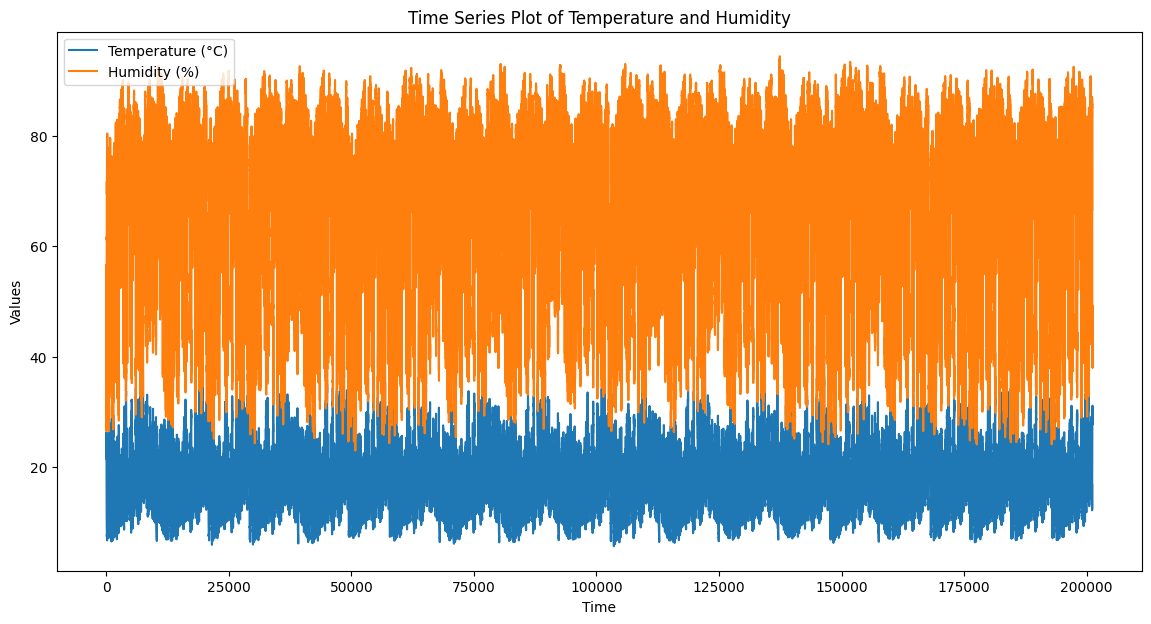

In [41]:
# Time series plot for temperature and humidity
plt.figure(figsize=(14, 7))
plt.plot(all_temp_data.reset_index(drop=True), label='Temperature (°C)')
plt.plot(all_humidity_data.reset_index(drop=True), label='Humidity (%)')
plt.title('Time Series Plot of Temperature and Humidity')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

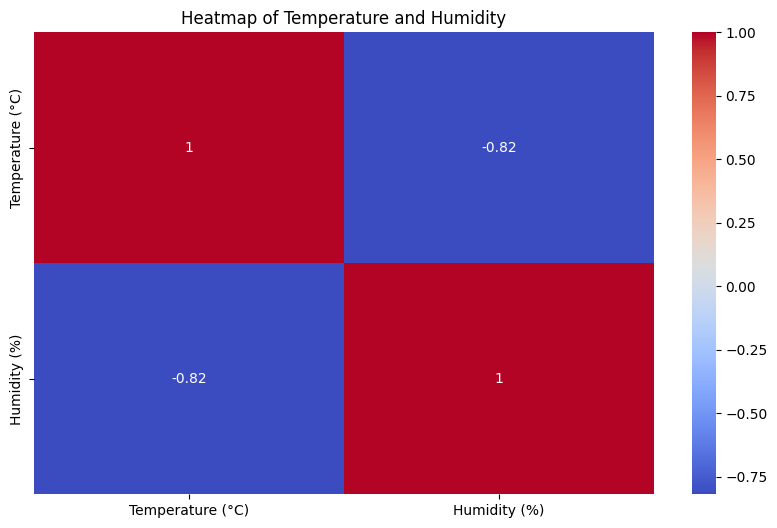

In [42]:
# Heatmap for temperature and humidity
heatmap_data = pd.concat([all_temp_data, all_humidity_data], axis=1)
heatmap_data.columns = ['Temperature (°C)', 'Humidity (%)']
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Temperature and Humidity')
plt.show()

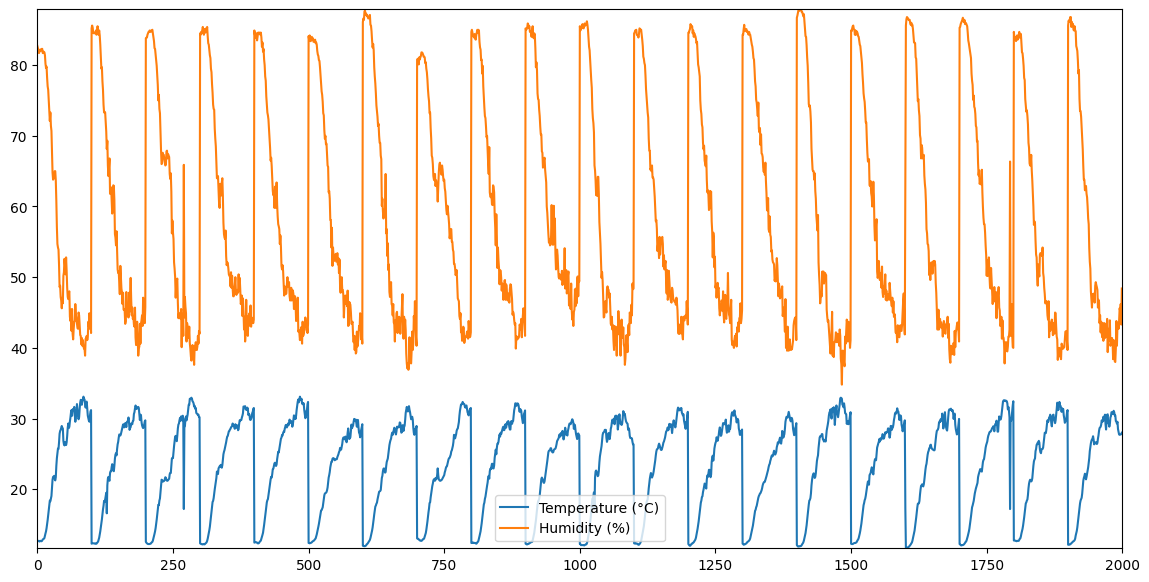

In [43]:
# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(14, 7))
line1, = ax.plot([], [], label='Temperature (°C)')
line2, = ax.plot([], [], label='Humidity (%)')
ax.set_xlim(0, len(animation_temp_data))
ax.set_ylim(min(animation_temp_data.min(), animation_humidity_data.min()), max(animation_temp_data.max(), animation_humidity_data.max()))

def update(frame):
    line1.set_data(range(frame), animation_temp_data[:frame])
    line2.set_data(range(frame), animation_humidity_data[:frame])
    return line1, line2

# Create animation
ani = FuncAnimation(fig, update, frames=len(animation_temp_data), blit=True, repeat=False)

# Save animation as a GIF using PillowWriter
ani.save('time_series_animation.gif', writer=PillowWriter(fps=30))

# Show the last frame as a static plot
update(len(animation_temp_data))
plt.legend()
plt.show()

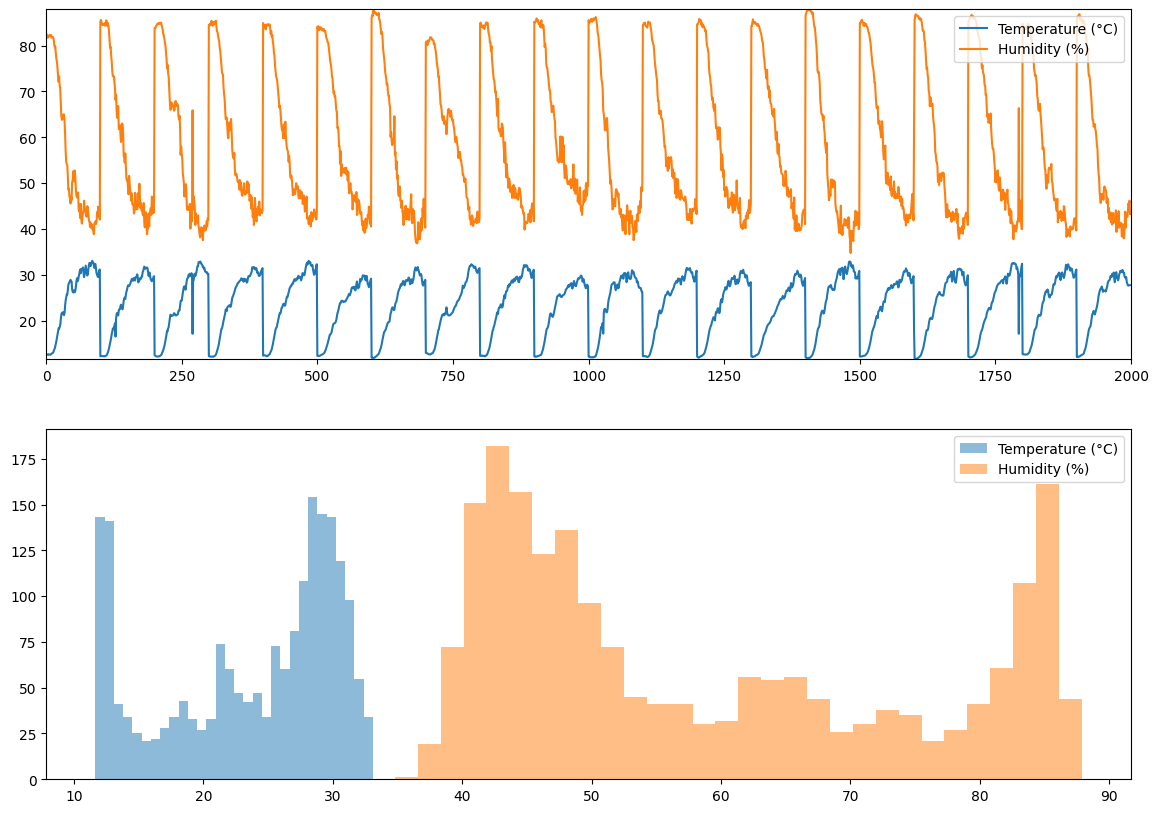

In [52]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
line1, = ax1.plot([], [], label='Temperature (°C)')
line2, = ax1.plot([], [], label='Humidity (%)')
ax1.set_xlim(0, len(animation_temp_data))
ax1.set_ylim(min(animation_temp_data.min(), animation_humidity_data.min()), max(animation_temp_data.max(), animation_humidity_data.max()))
ax1.legend()

def update(frame):
    ax2.cla()
    ax2.hist(animation_temp_data[:frame], bins=30, alpha=0.5, label='Temperature (°C)')
    ax2.hist(animation_humidity_data[:frame], bins=30, alpha=0.5, label='Humidity (%)')
    ax2.legend()
    
    line1.set_data(range(frame), animation_temp_data[:frame])
    line2.set_data(range(frame), animation_humidity_data[:frame])
    return line1, line2

ani = FuncAnimation(fig, update, frames=len(animation_temp_data), blit=True, repeat=False)
ani.save('combined_time_series_histogram_animation.gif', writer=PillowWriter(fps=30))
plt.show()